In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, accuracy_score


df = pd.read_csv('processed_data.csv')
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [ ]:
# Define Features (X) and Target (y)
X = df.drop('Target', axis=1)
y = df['Target']

print("Features and Target defined.")

Features and Target defined.


In [ ]:
# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Complete.")

Data Split Complete.


In [ ]:
# Initialize and Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model Trained!")

Model Trained!


ACCURACY: 87.74%

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.86      0.84       277
    Graduate       0.91      0.89      0.90       449

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



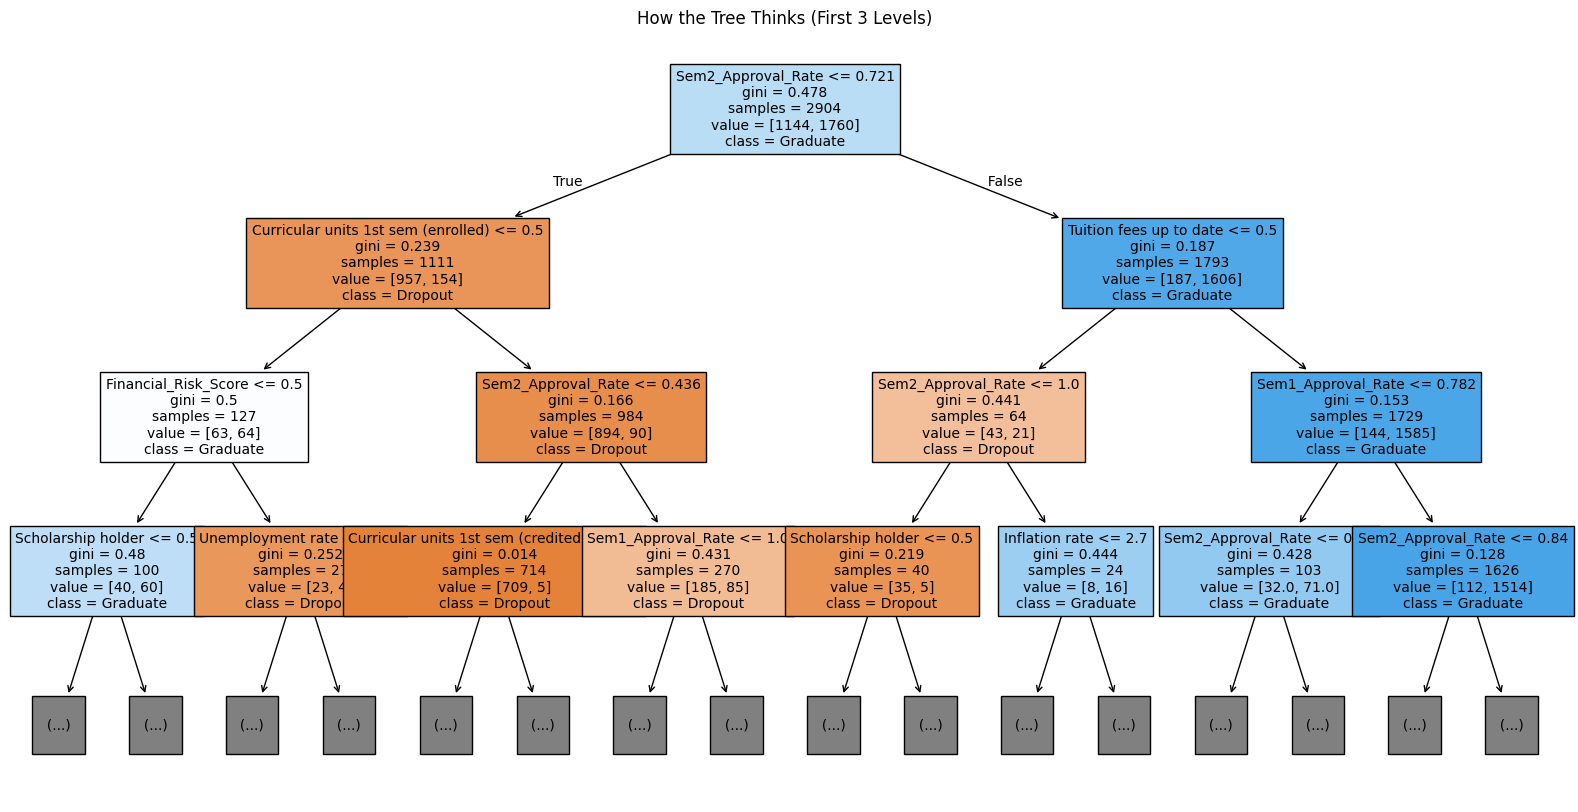

Model saved as 'decision_tree_model.pkl'


In [ ]:
# 1. Predict
y_pred = model.predict(X_test)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("="*30)
print(f"ACCURACY: {accuracy * 100:.2f}%")
print("="*30)

# 3. Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# 4. VISUALIZATION (The Cool Part)
# This draws the first 3 levels of decisions
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Dropout', 'Graduate'],
          filled=True, max_depth=3, fontsize=10)
plt.title("How the Tree Thinks (First 3 Levels)")
plt.show()

# 5. Save
pickle.dump(model, open('decision_tree_model.pkl', 'wb'))
print("Model saved as 'decision_tree_model.pkl'")


3. TRAINING vs TESTING ACCURACY (POC CHECK)
Training Accuracy: 1.0000 (100.00%)
Testing Accuracy:  0.8774 (87.74%)
 Status: OVERFITTING DETECTED (Train >> Test)

2. SAMPLE PREDICTIONS (Minimum 6)
Student ID   | Actual     | Predicted  | Result
--------------------------------------------------
149          | Dropout    | Dropout    |  Correct
1991         | Graduate   | Graduate   |  Correct
1237         | Graduate   | Graduate   |  Correct
3501         | Dropout    | Dropout    |  Correct
3451         | Graduate   | Graduate   |  Correct
879          | Graduate   | Graduate   |  Correct

4 & 5. COMPLETE CONFUSION MATRIX


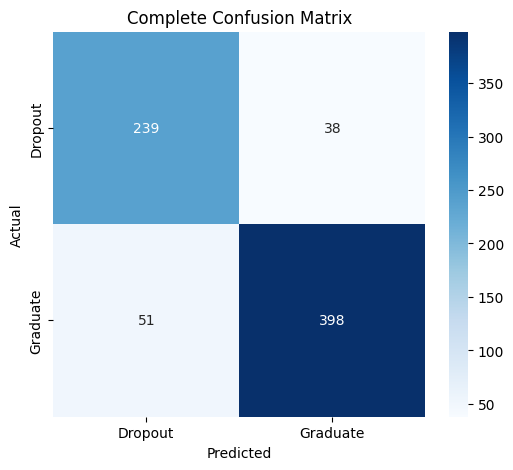


5-9. ROC CURVE & OPTIMUM THRESHOLD CALCULATION
 Optimum Threshold: 1.0000
   (At this point: TPR=0.8864, FPR=0.1372)
 AUC Score: 0.8746 (Probability of correct ranking)


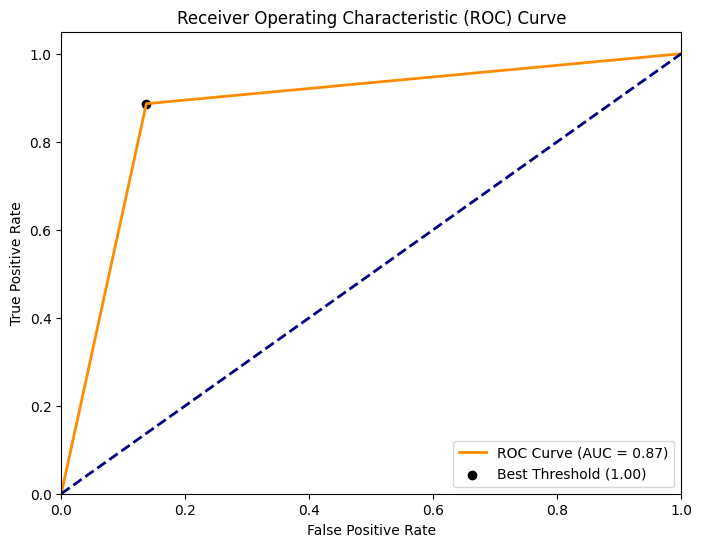

In [ ]:
# Calculate Train vs Test Accuracy ---
print("\n" + "="*50)
print(" TRAINING vs TESTING ACCURACY (POC CHECK)")
print("="*50)
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({(train_acc*100):.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({(test_acc*100):.2f}%)")

if train_acc - test_acc > 0.05:
    print(" Status: OVERFITTING DETECTED (Train >> Test)")
else:
    print(" Status: GOOD FIT (Balanced Model)")


#  Sample Predictions ---
print("\n" + "="*50)
print(" SAMPLE PREDICTIONS (Minimum 6)")
print("="*50)
# Pick 6 random students from the test set
indices = np.random.choice(X_test.index, size=6, replace=False)
sample_X = X_test.loc[indices]
sample_y = y_test.loc[indices]

# Predict
sample_preds = model.predict(sample_X)
sample_probs = model.predict_proba(sample_X)[:, 1]

# Print Table
print(f"{'Student ID':<12} | {'Actual':<10} | {'Predicted':<10} | {'Result'}")
print("-" * 50)
for i in range(6):
    sid = indices[i]
    act = "Graduate" if sample_y.iloc[i] == 1 else "Dropout"
    pred = "Graduate" if sample_preds[i] == 1 else "Dropout"
    res = " Correct" if act == pred else " Wrong"
    print(f"{sid:<12} | {act:<10} | {pred:<10} | {res}")


# : Complete Confusion Matrix ---
print("\n" + "="*50)
print("COMPLETE CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.title('Complete Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC Curve & Optimum Threshold ---
print("\n" + "="*50)
print(" ROC CURVE & OPTIMUM THRESHOLD CALCULATION")
print("="*50)

# 1. Get Probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# 2. Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. Calculate Optimum Threshold (Youden's J Statistic)
# J = TPR - FPR. The max J is the "Optimum Point".
J = tpr - fpr
ix = np.argmax(J) # Find the index of the highest J
best_thresh = thresholds[ix]

print(f" Optimum Threshold: {best_thresh:.4f}")
print(f"   (At this point: TPR={tpr[ix]:.4f}, FPR={fpr[ix]:.4f})")
print(f" AUC Score: {roc_auc:.4f} (Probability of correct ranking)")

# 4. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Mark the optimum point
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label=f'Best Threshold ({best_thresh:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()